In [46]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [36]:
data_x = pd.read_csv('data_x.csv')
data_y = pd.read_csv('data_y.csv')

In [38]:
# Min-Max Scaling
# Normalize Stock Price & Maturity

columns_to_norm = data_x.columns[list(range(7)) + [12]]
scaler_x = MinMaxScaler(feature_range=(0, 1))
data_x[columns_to_norm] = scaler_x.fit_transform(data_x[columns_to_norm])

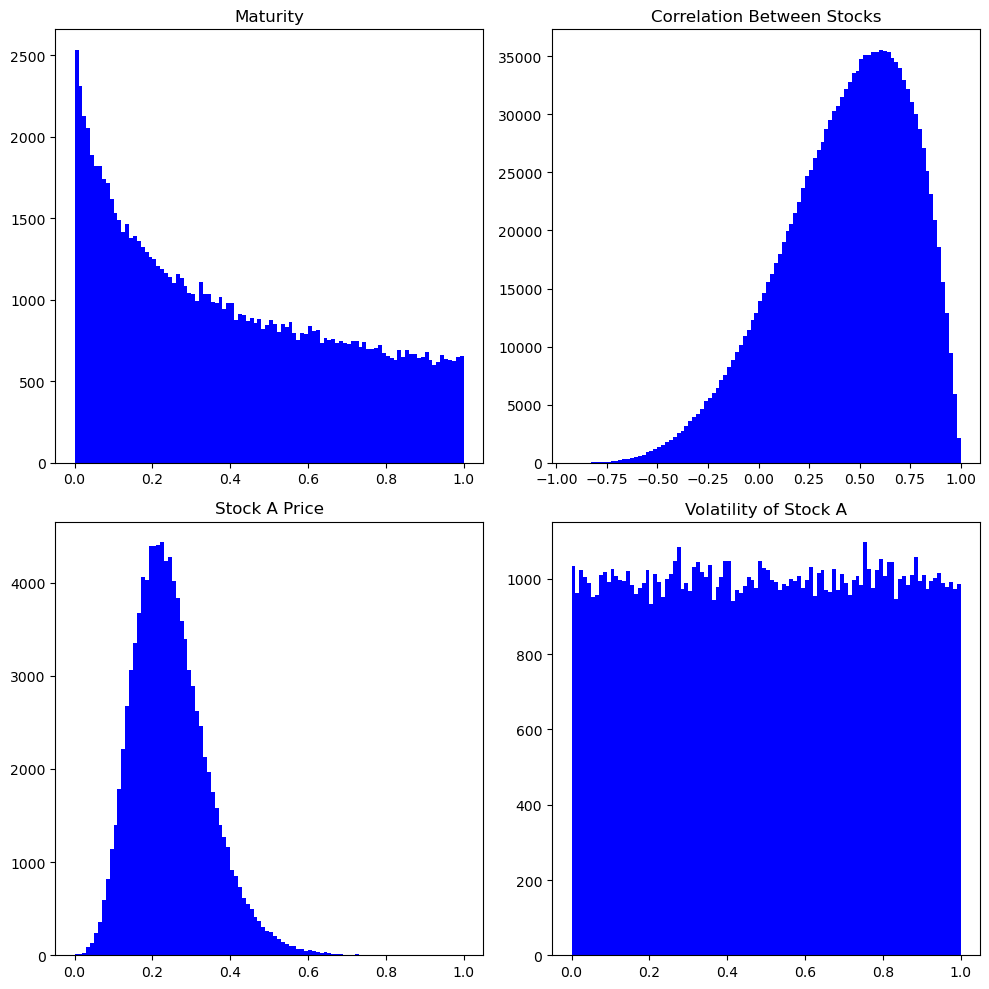

In [44]:
forward_stock_prices = data_x.values[:, :6]
stock_volatilities = data_x.values[:, 6:12]
maturities = data_x.values[:, 12]
correlations = data_x.values[:, 13:28].reshape(-1) 

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Maturity
axs[0, 0].hist(maturities, bins=100, color='blue')
axs[0, 0].set_title('Maturity')

# Correlation
axs[0, 1].hist(correlations, bins=100, color='blue')
axs[0, 1].set_title('Correlation Between Stocks')

# Stock A Price
axs[1, 0].hist(forward_stock_prices[:, 0], bins=100, color='blue')  # Just an example with stock A
axs[1, 0].set_title('Stock A Price')

# Volatility of Stock A
axs[1, 1].hist(stock_volatilities[:, 0], bins=100, color='blue')  # Just an example with stock A
axs[1, 1].set_title('Volatility of Stock A')

# Show plots
plt.tight_layout()
plt.show()

In [39]:
scaler_y = MinMaxScaler(feature_range=(0, 1))
data_y = pd.DataFrame(scaler_y.fit_transform(data_y[['0']]))

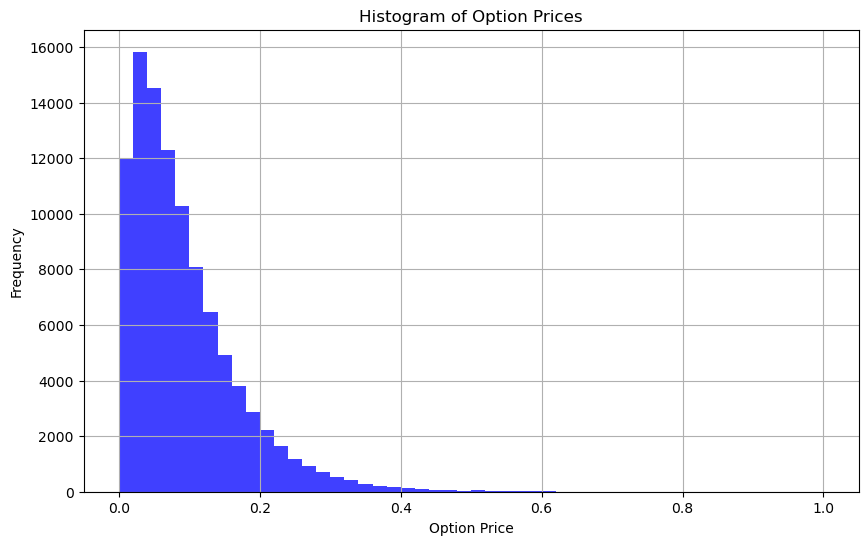

In [45]:
# Plot histogram of the option prices
plt.figure(figsize=(10, 6))
plt.hist(data_y, bins=50, alpha=0.75, color='blue')
plt.title('Histogram of Option Prices')
plt.xlabel('Option Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=0)

In [52]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)